# Microwave instability simulation

<a href="http://www.inp.nsk.su/~petrenko/">A. Petrenko</a> (Novosibirsk, 2019)

This notebook explains the basics of longitudinal particle motion in a storage ring with impedance.

In [1]:
import numpy as np
import holoviews as hv

hv.extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
#import warnings
#warnings.filterwarnings('ignore')

In [3]:
c = 299792458 # m/c
mc = 0.511e6 # eV/c
Qe = 1.60217662e-19 # elementary charge in Coulombs

p0 = 400e6 # eV/c

### Electron beam definition

In [4]:
Ne = 2e10  # Number of electrons/positrons in the beam
N  = 200000 # number of macro-particles in this simulation

In [5]:
print("Bunch charge = %.1f nC" % (Ne*Qe/1e-9))

Bunch charge = 3.2 nC


Electron beam parameters:

In [6]:
sigma_z = 0.6 # m
#sigma_z = 1.0e-2 # m -- to test wakefield calculation

sigma_dp = 0.004 # relative momentum spread

Distribution in $z$ and $\delta p = \frac{\Delta p}{p}$ can be defined easily since they are not correlated:

In [7]:
z0  = np.random.normal(scale=sigma_z, size=N)
#z0  = np.random.uniform(low=-sigma_z*2, high=sigma_z*2, size=N)
dp0 = np.random.normal(scale=sigma_dp, size=N)

In [8]:
%opts Scatter (alpha=0.01 s=1) [aspect=3 show_grid=True]

dim_z  = hv.Dimension('z',  unit='m', range=(-12,+12))
dim_dp = hv.Dimension('dp', label=r'100%*$\Delta p/p$', range=(-1.5,+1.5))

%output backend='matplotlib' fig='png' size=200 dpi=100

:Scatter   [z]   (100%*$\Delta p/p$)
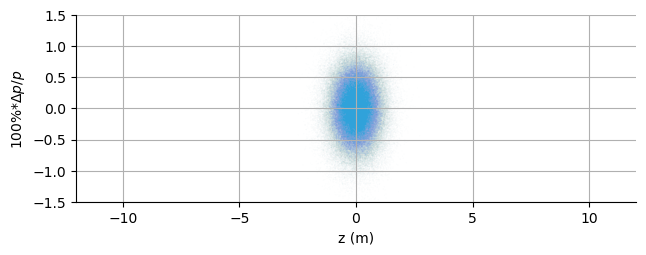

In [9]:
hv.Scatter((z0,dp0*100), kdims=dim_z, vdims=dim_dp)

The function to get beam current profile corresponding to particle distribution:

In [10]:
def get_I(z, z_bin = 0.05, z_min=-15, z_max=+15):
    # z, z_bin, z_min, z_max in meters
    
    hist, bins = np.histogram( z, range=(z_min, z_max), bins=int((z_max-z_min)/z_bin) )
    Qm = Qe*Ne/N # macroparticle charge in C
    I = hist*Qm/(z_bin/c) # A

    z_centers = (bins[:-1] + bins[1:]) / 2
    
    return z_centers, I

:Area   [z]   (I)
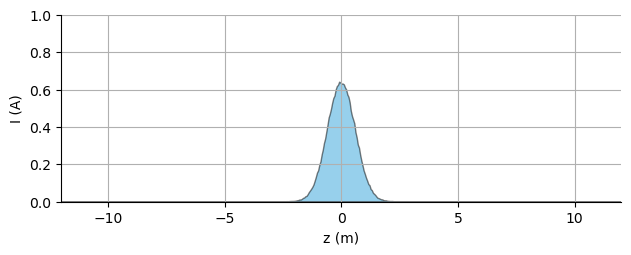

In [11]:
%opts Area [show_grid=True aspect=3] (alpha=0.5)

dim_I = hv.Dimension('I',  unit='A',  range=(0.0,+1.0))

hv.Area(get_I(z0), kdims=[dim_z], vdims=[dim_I])

### Effects of RF-resonator

Longitudinal momentum gain of electron after it has passed through the RF-resonator depends on the electron phase with respect to the RF:

$$
\frac{dp_z}{dt} = eE_{\rm{RF}}\cos\phi,
$$

where $E_{\rm{RF}}$ is the accelerating electric field and $\phi$ is the electron phase in the RF resonator. The resulting longitudinal momentum change:

$$
\delta p_z = e\frac{ V_{\rm{RF}} }{ L_{\rm{RF}}} (\cos\phi) \Delta t = e\frac{ V_{\rm{RF}} }{c} \cos\phi,
$$

where $V_{\rm{RF}}$ is the RF-voltage.

RF-resonator frequency $f_{\rm{RF}}$ is some harmonic $h$ of revolution frequency:

$$
f_{\rm{RF}} = \frac{h}{T_s},
$$

where $T_s$ is the revolution period.

Longitudinal coordinate $z$ gives the longitudinal distance from the electron to the reference particle at the moment when the reference particle arrives at the RF-phase $\phi_0$ (which is always the same). So the electron then arrives to the RF-resonator after the time

$$
\Delta T = -\frac{z}{c}.
$$

Then the electron phase in the RF-resonator is

$$
\phi = \phi_0 + 2\pi f_{\rm{RF}}\Delta T = \phi_0 - 2\pi \frac{hz}{T_s c} \approx \phi_0 - 2\pi \frac{hz}{L}.
$$

where $L$ is the ring perimeter. If the electron momentum is different from its reference value then the period of revolution $T$ is different from $T_s$:
$$
T = \frac{L+\Delta l}{\upsilon_s + \Delta \upsilon} \approx T_s \left ( 1 + \frac{\Delta l}{L} - \frac{\Delta \upsilon}{\upsilon_s} \right ) \approx T_s \left ( 1 + \frac{\Delta l}{L} - \frac{1}{\gamma^2} \frac{\Delta p}{p} \right ).
$$
The difference between the length of electron trajectory and the reference orbit length is given by the $M_{56}$ element of the 1-turn transport matrix:
$$
\Delta l = M_{56} \frac{\Delta p} {p}.
$$
$\Delta T = T - T_s$ in can be written as
$$
\Delta T \approx T_s \left ( \frac{M_{56}}{L} - \frac{1}{\gamma^2} \right ) \frac{\Delta p}{p} = T_s \left ( \frac{1}{\gamma_t^2} - \frac{1}{\gamma^2} \right ) \frac{\Delta p}{p} = T_s\eta\frac{\Delta p}{p}.
$$

Then the longitudinal position after one turn is
$$
z_{n+1} = z_n - L \eta\frac{\Delta p_{n+1}}{p}.
$$

## Multi-turn tracking

In [12]:
L = 27.0 # m -- storage ring perimeter
gamma_t = 6.0 # gamma transition in the ring
eta = 1/(gamma_t*gamma_t) - 1/((p0/mc)*(p0/mc))

In [13]:
#N_turns = 1000020
N_turns = 2000
N_plots = 11

h = 1
eVrf = 5e3 # eV
#eVrf = 0.0 # eV
phi0 = np.pi/2

t_plots = np.arange(0,N_turns+1,int(N_turns/(N_plots-1)))

data2plot = {}

z = z0; dp = dp0
for turn in range(0,N_turns+1):
    if turn in t_plots:
        print( "\rturn = %g (%g %%)" % (turn, (100*turn/N_turns)), end="")
        data2plot[turn] = (z,dp)
    
    phi = phi0 - 2*np.pi*h*(z/L)  # phase in the resonator
    
    # 1-turn transformation:
    dp  = dp + eVrf*np.cos(phi)/p0
    z = z - L*eta*dp

turn = 2000 (100 %)

In [14]:
def plot_z_dp(turn):
    z, dp = data2plot[turn]
    z_dp = hv.Scatter((z, dp*100), kdims=dim_z, vdims=dim_dp)
    z_I  = hv.Area(get_I(z), kdims=dim_z, vdims=dim_I)
    return (z_dp+z_I).cols(1)

In [15]:
#plot_z_dp(1000)

:Layout
   .Scatter.I :HoloMap   [Turn]
      :Scatter   [z]   (100%*$\Delta p/p$)
   .Area.I    :HoloMap   [Turn]
      :Area   [z]   (I)
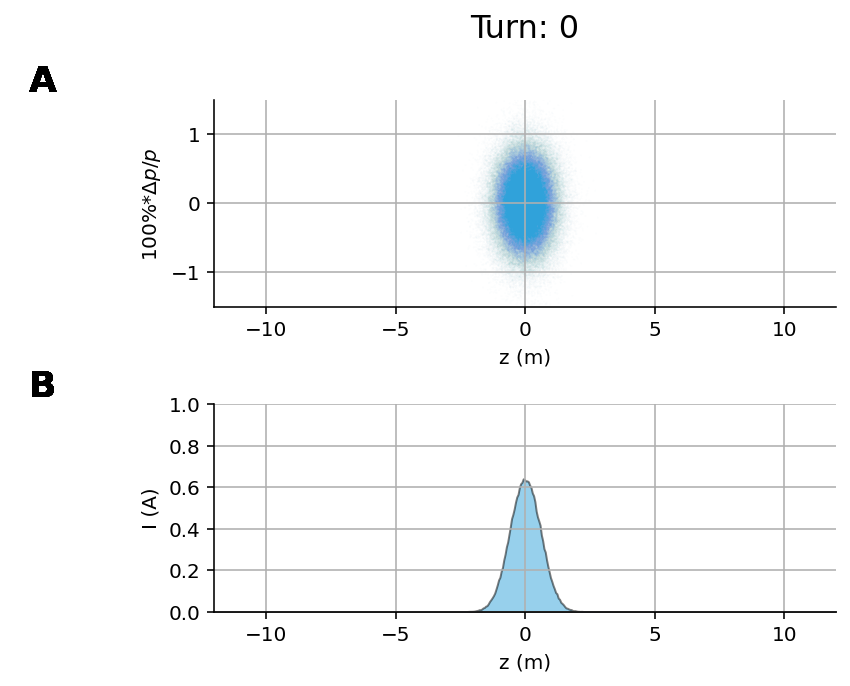
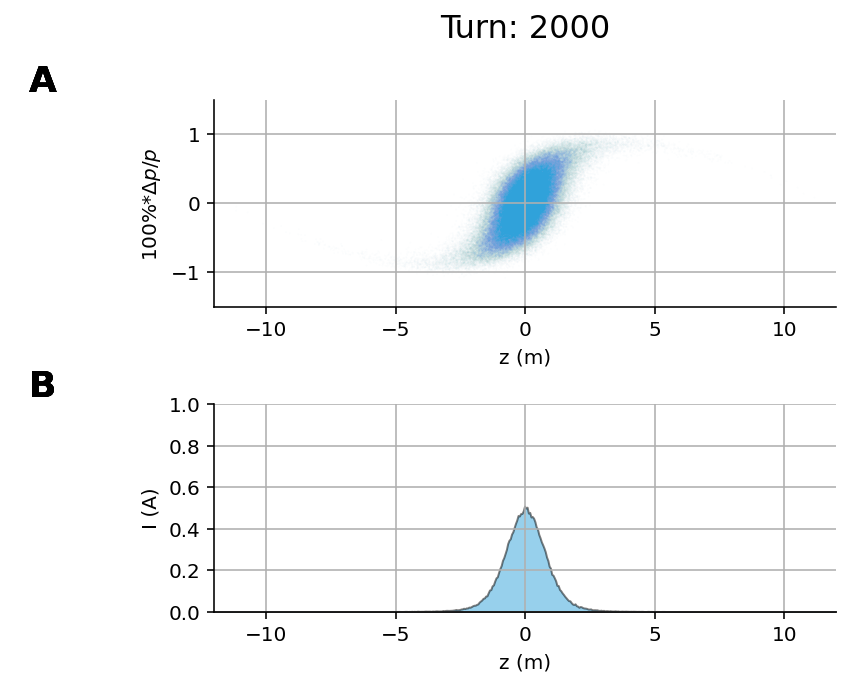
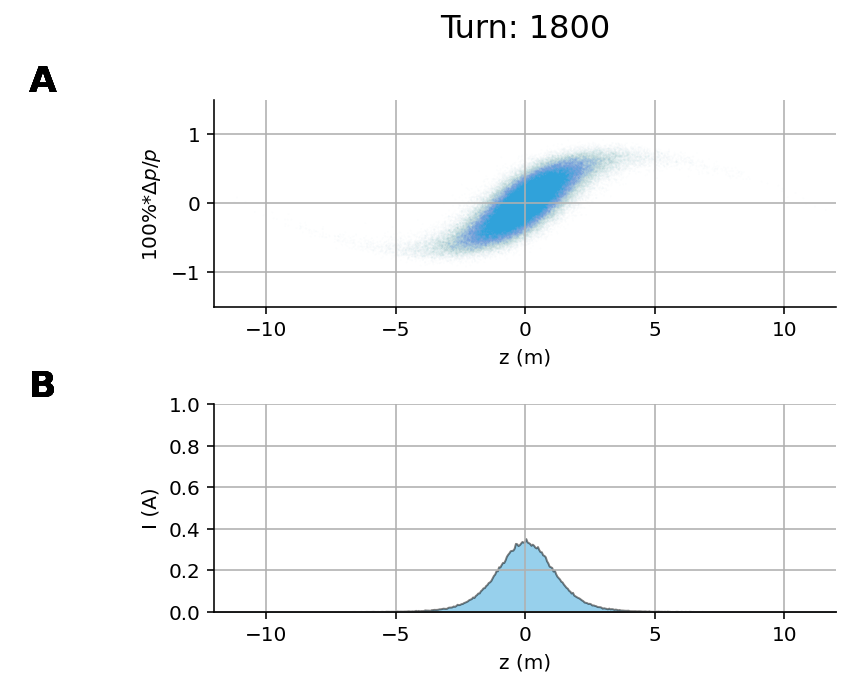
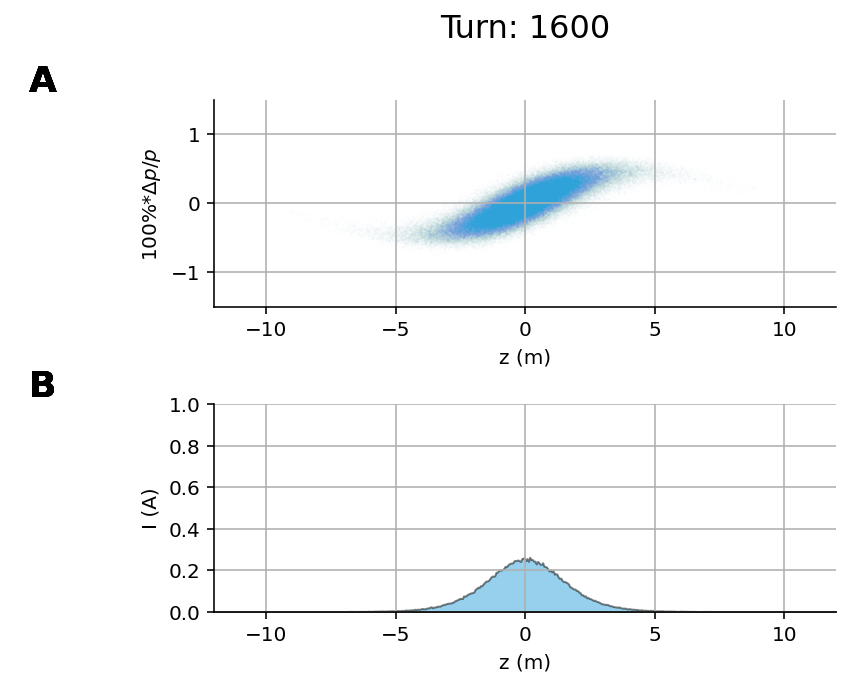
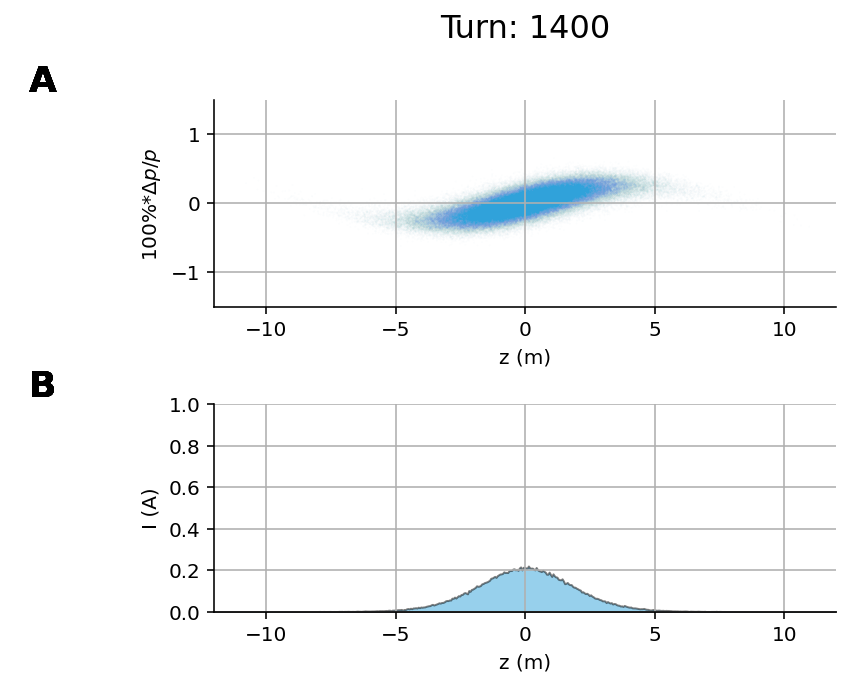
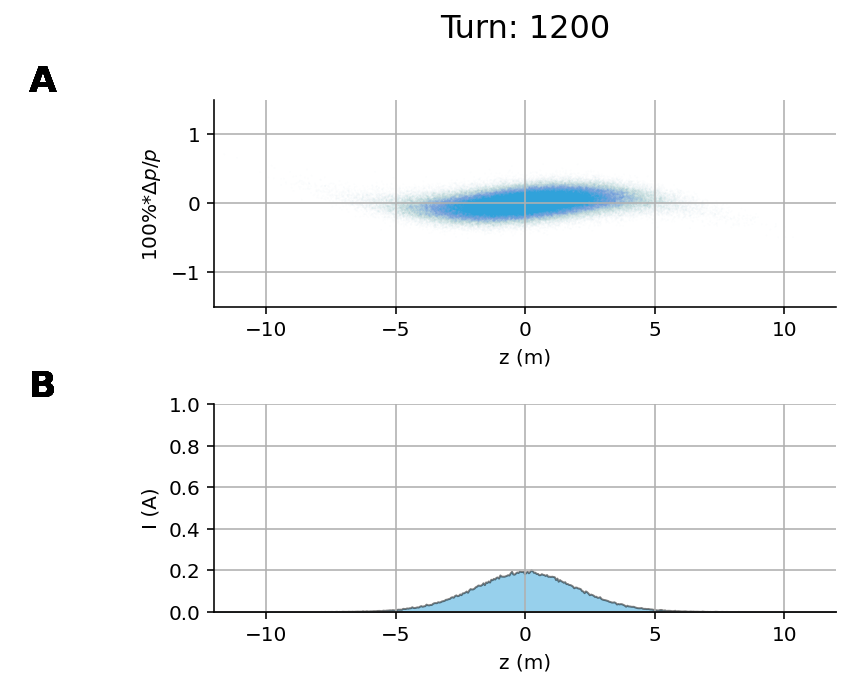
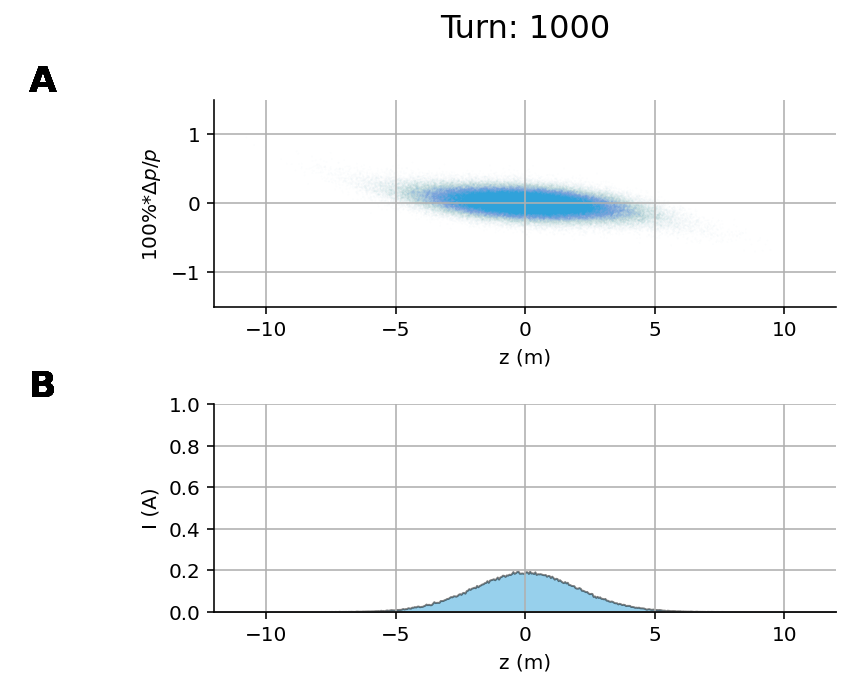
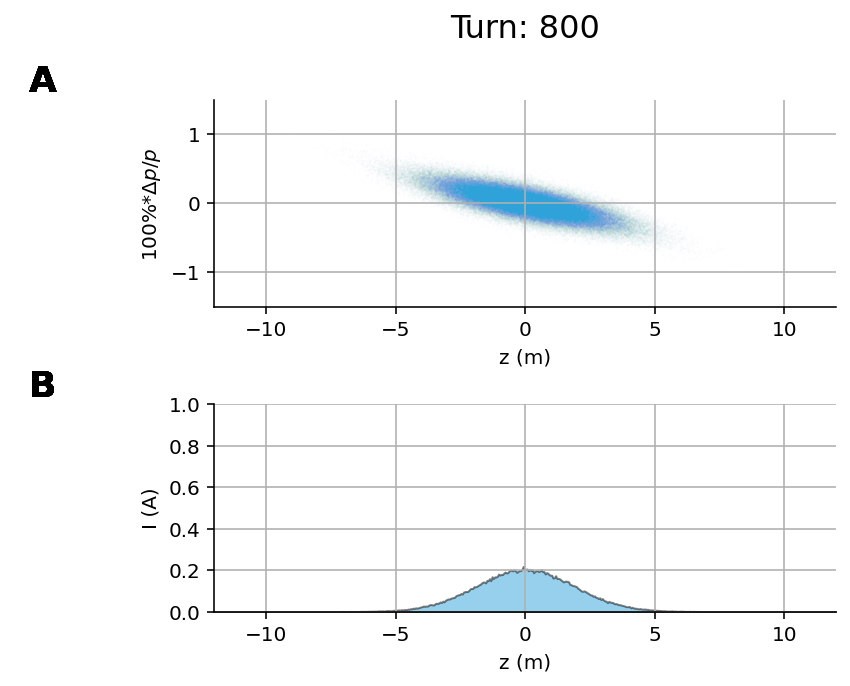
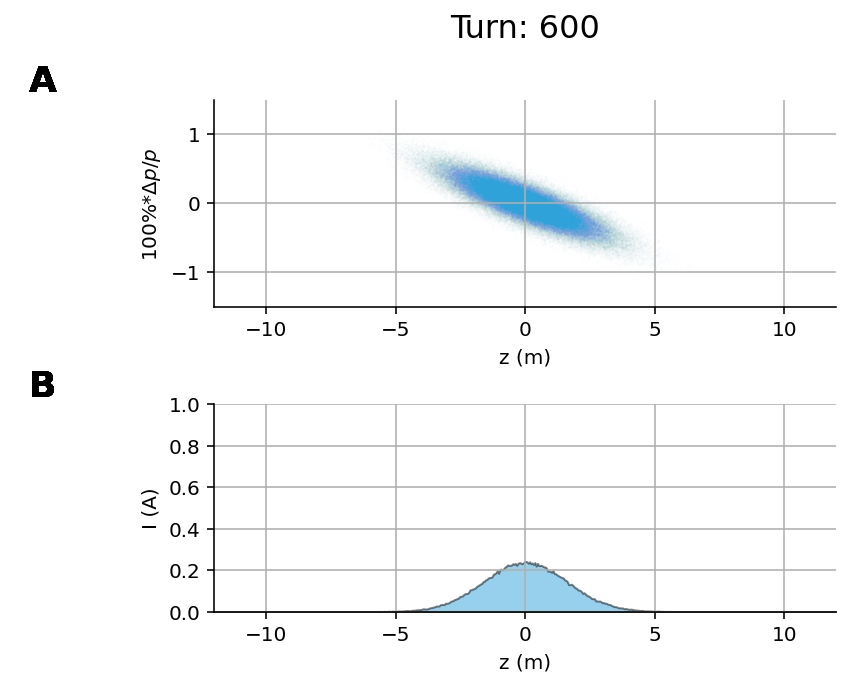
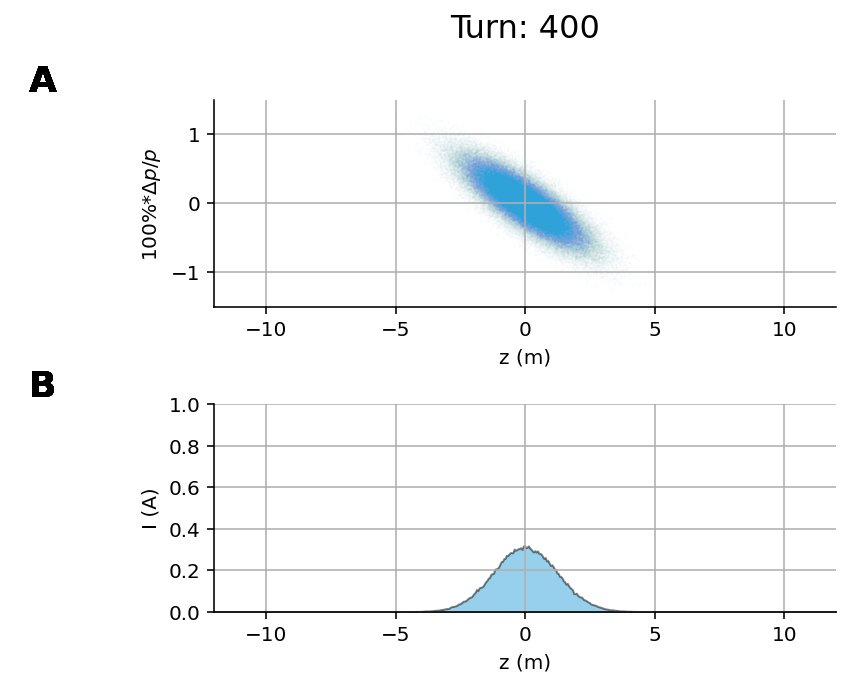
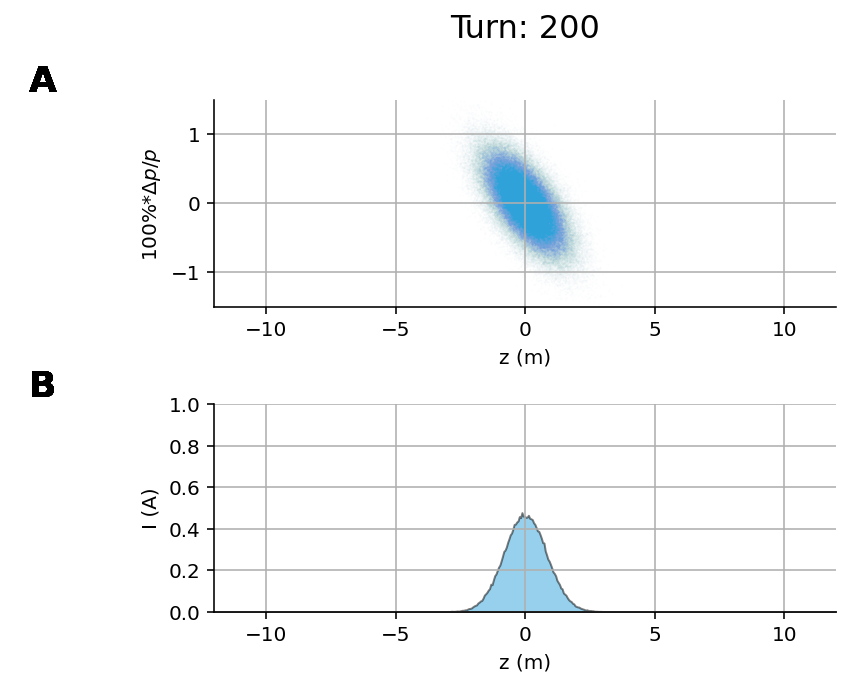
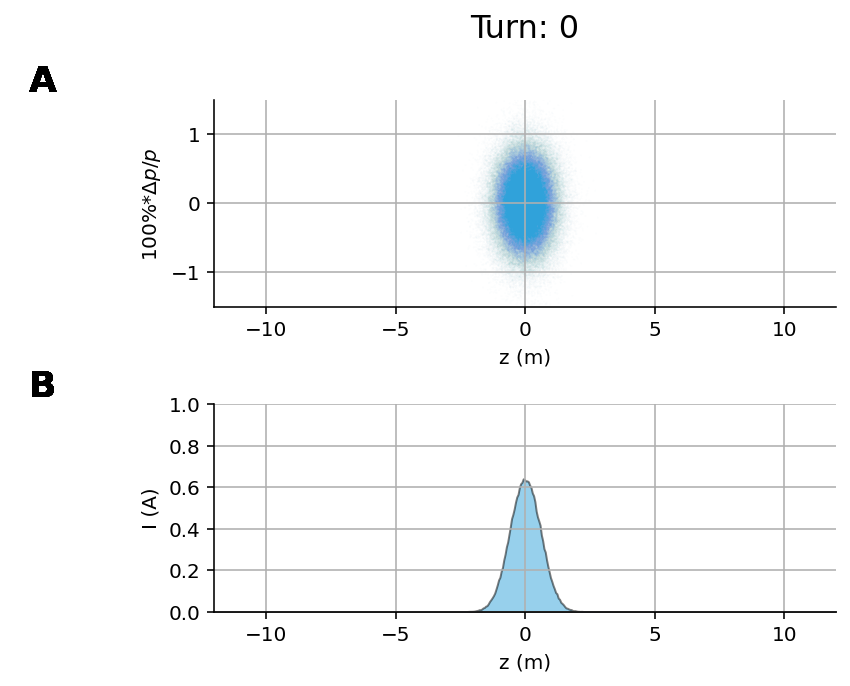

In [16]:
items = [(turn, plot_z_dp(turn)) for turn in t_plots]

m = hv.HoloMap(items, kdims = ['Turn'])
m = m.collate()
m.opts(fig_size=120)

## Longitudinal wakefield

Now let's introduce the longitiudinal wakefield.

First define wake-function in terms of $\xi = z - ct$:

Equation for wake-function can be obtained by performing a Fourier transformation of the impedance

$$
Z = \frac{R_s}{1 + iQ\left(\frac{\omega_R}{\omega} -\frac{\omega}{\omega_R}\right)},
$$
where $Q$ is the quality factor, $\omega_R$ is the frequency.

(from A. Chao's book &#147;<a href=http://www.slac.stanford.edu/~achao/wileybook.html>Physics of Collective Beam Instabilities in High Energy Accelerators</a>&#148;. <a href=http://www.slac.stanford.edu/~achao/WileyBook/WileyChapter2.pdf>Chapter 2</a>, p. 73):

$$
W(\xi) = \begin{cases}
 2\alpha R_s e^{\alpha \xi/c}\left(\cos\frac{\overline{\omega} \xi}{c} + \frac{\alpha}{\overline{\omega}}\sin\frac{\overline{\omega} \xi}{c}\right), & \mbox{if } \xi < 0 \\
 \alpha R_s, & \mbox{if } \xi = 0 \\
 0, & \mbox{if } \xi > 0,
\end{cases}
$$

where $\alpha = \omega_R / 2Q$ and $\overline\omega = \sqrt{\omega_R^2 -\alpha^2}$.

In [17]:
def Wake(xi):
    # of course some other wake can be defined here.
    
    fr = 0.3e9 # Hz
    Rs = 1.0e5 # Ohm
    Q  = 5  # quality factor
   
    wr = 2*np.pi*fr
    alpha = wr/(2*Q)
    wr1 = wr*np.sqrt(1 - 1/(4*Q*Q))
    
    W = 2*alpha*Rs*np.exp(alpha*xi/c)*(np.cos(wr1*xi/c) + (alpha/wr1)*np.sin(wr1*xi/c))
    W[xi==0] = alpha*Rs
    W[xi>0] = 0
    
    return W

:Curve   [xi]   ($W$)
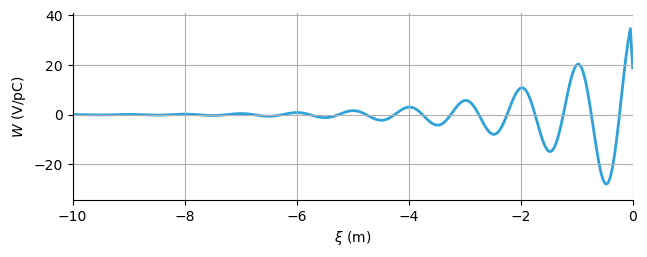

In [18]:
%opts Curve [show_grid=True aspect=3]

dim_xi   = hv.Dimension('xi', label=r"$\xi$", unit='m')
dim_Wake = hv.Dimension('W',  label=r"$W$", unit='V/pC')

L_wake = 10 # m
dz = 0.04 # m
xi = np.linspace(-L_wake, 0, int(L_wake/dz)) # m
W = Wake(xi)

hv.Curve((xi, W/1.0e12), kdims=[dim_xi], vdims=[dim_Wake])

### Wakefield from e-bunch

Longitudinal wake-function defines the wakefield amplitude from a point-like charge. Therefore a distribution of charge will produce the wakefield

$$
E(z) = -\int\limits_{z}^{+\infty} W(z-z')I(z')dz'/c = -\int\limits_{-\infty}^{0} W(\xi)I(z-\xi)d\xi/c,
$$

In [19]:
zc, I = get_I(z0, z_bin=dz)

V = -np.convolve(W, I)*dz/c # V

In [20]:
zV = np.linspace(max(zc)-dz*len(V), max(zc), len(V))

:Layout
   .Curve.I :Curve   [z]   (V)
   .Area.I  :Area   [z]   (I)
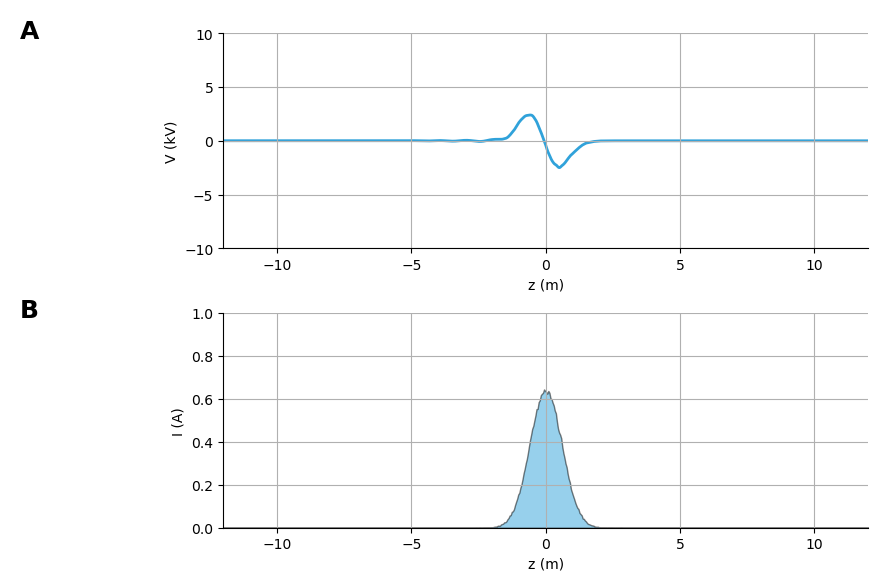

In [21]:
dim_V = hv.Dimension('V', unit='kV', range=(-10,+10))

(hv.Curve((zV, V/1e3), kdims=[dim_z], vdims=[dim_V]) + \
 hv.Area((zc,I), kdims=[dim_z], vdims=[dim_I])).cols(1)

## Tracking with impedance

In [22]:
data2plot = {}

#eVrf = 0    # V
#eVrf = 3e3 # V

z = z0; dp = dp0
for turn in range(0,N_turns+1):
    if turn in t_plots:
        print( "\rturn = %g (%g %%)" % (turn, (100*turn/N_turns)), end="")
        data2plot[turn] = (z,dp)
    
    phi = phi0 - 2*np.pi*h*(z/L)  # phase in the resonator
    
    # RF-cavity
    dp  = dp + eVrf*np.cos(phi)/p0
    
    # wakefield:
    zc, I = get_I(z, z_bin=dz) # A
    V = -np.convolve(W, I)*dz/c # V    
    V_s = np.interp(z,zV,V)
    dp  = dp + V_s/p0

    # z after one turn:
    z = z - L*eta*dp

turn = 2000 (100 %)

In [23]:
def plot_z_dp(turn):
    z, dp = data2plot[turn]
    z_dp = hv.Scatter((z, dp*100), kdims=dim_z, vdims=dim_dp)
    zc, I = get_I(z, z_bin=dz)
    z_I  = hv.Area((zc,I), kdims=dim_z, vdims=dim_I)
    V = -np.convolve(W, I)*dz/c # V
    z_V  = hv.Curve((zV, V/1e3), kdims=dim_z, vdims=dim_V)
    return (z_dp+z_I+z_V).cols(1)

:Layout
   .Scatter.I :HoloMap   [Turn]
      :Scatter   [z]   (100%*$\Delta p/p$)
   .Area.I    :HoloMap   [Turn]
      :Area   [z]   (I)
   .Curve.I   :HoloMap   [Turn]
      :Curve   [z]   (V)
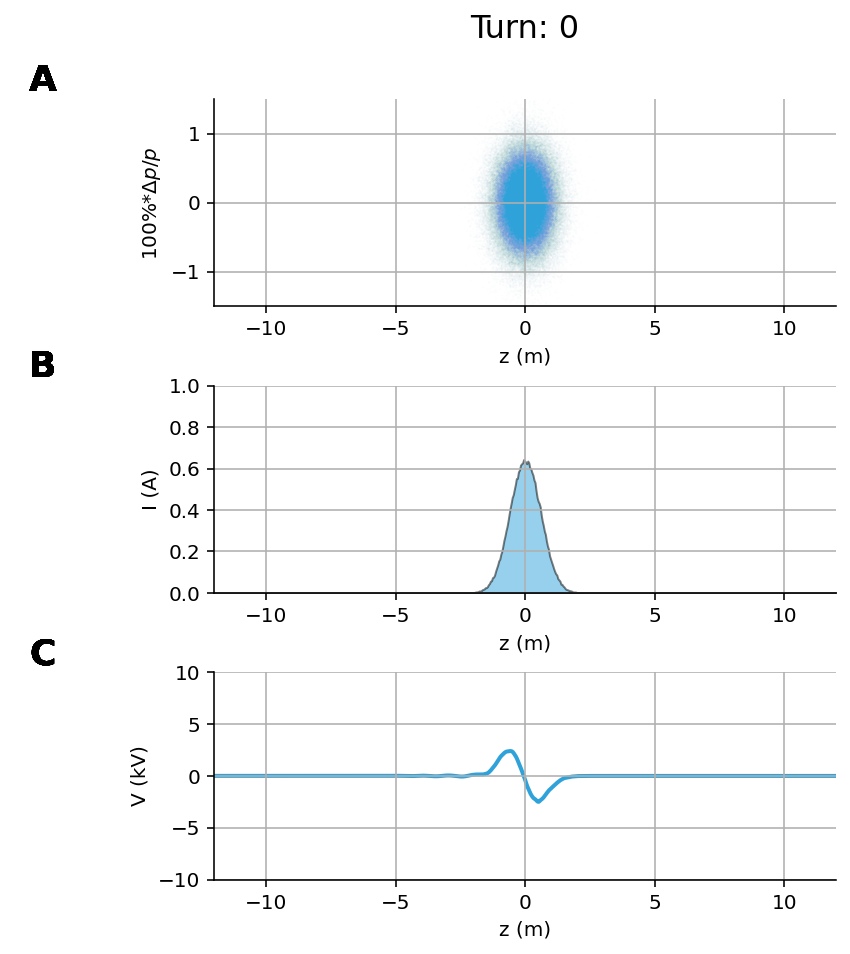
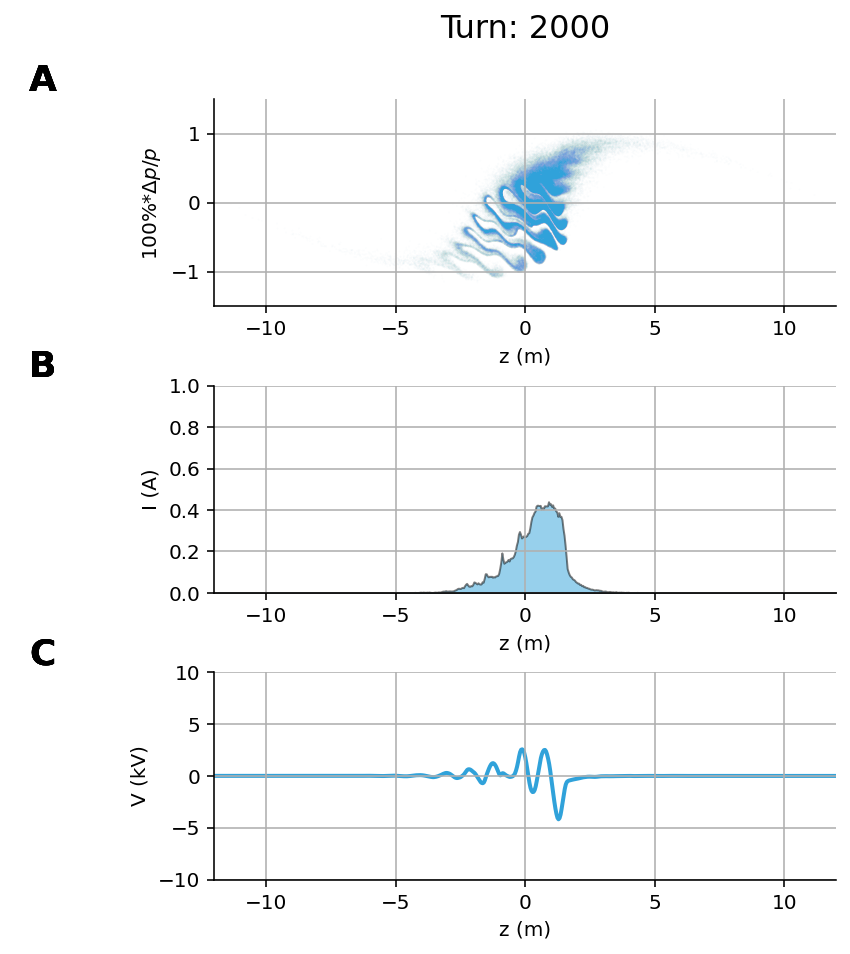
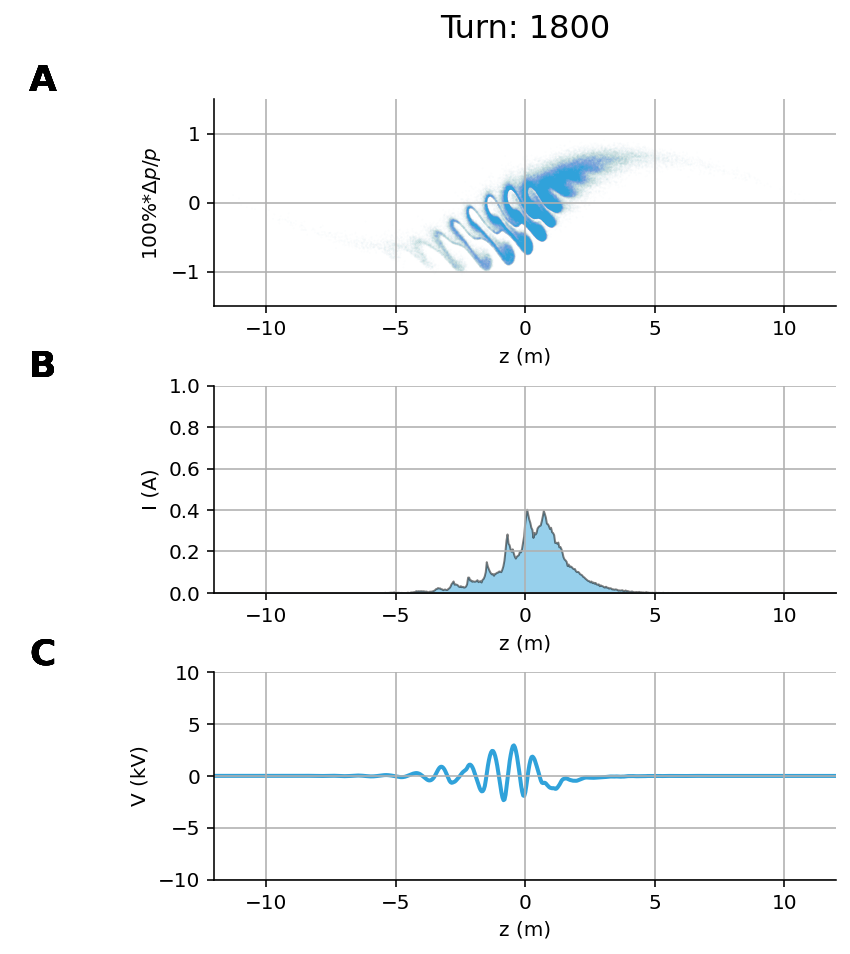
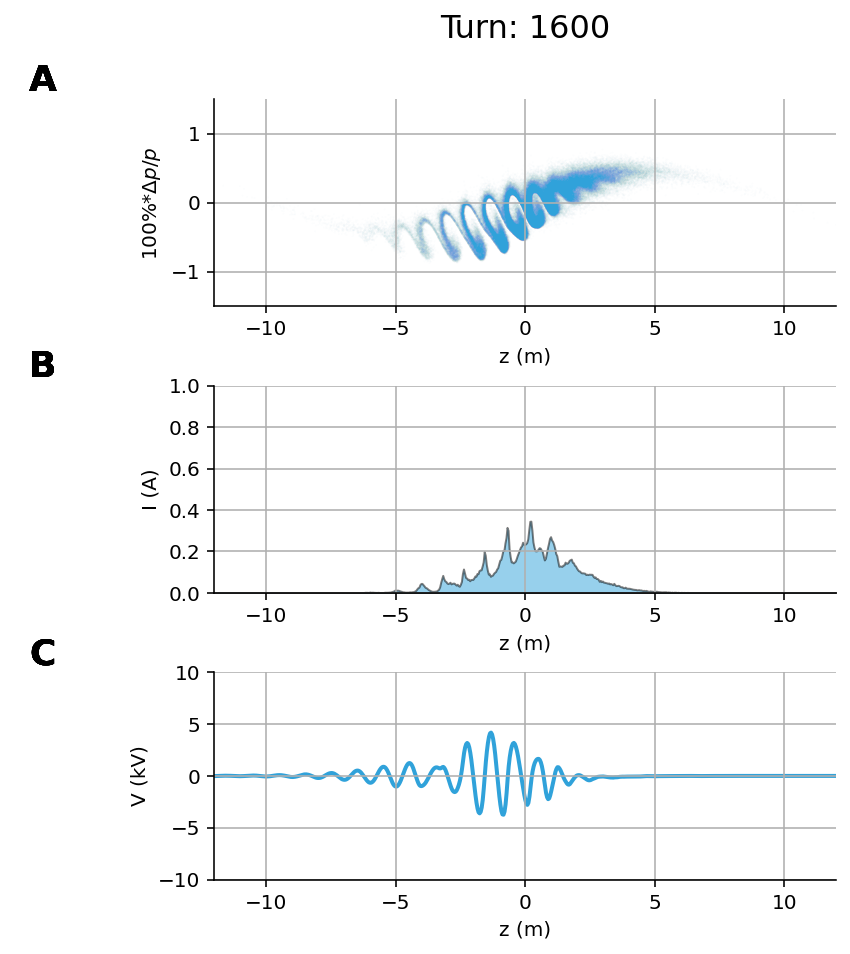
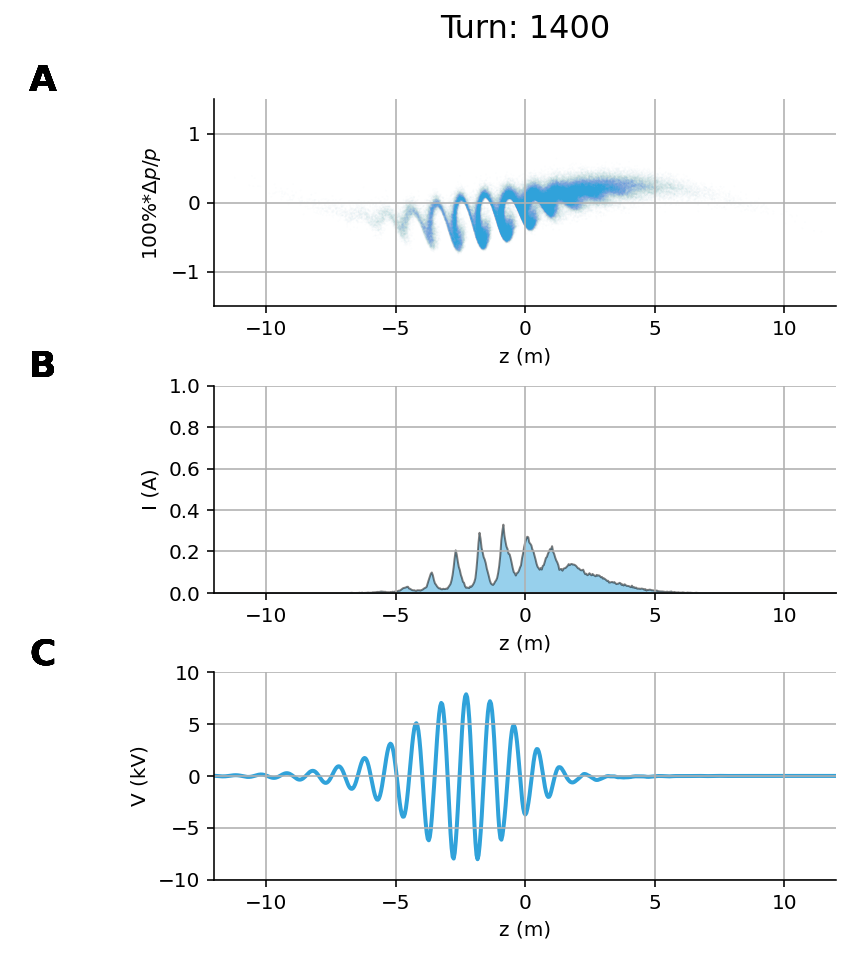
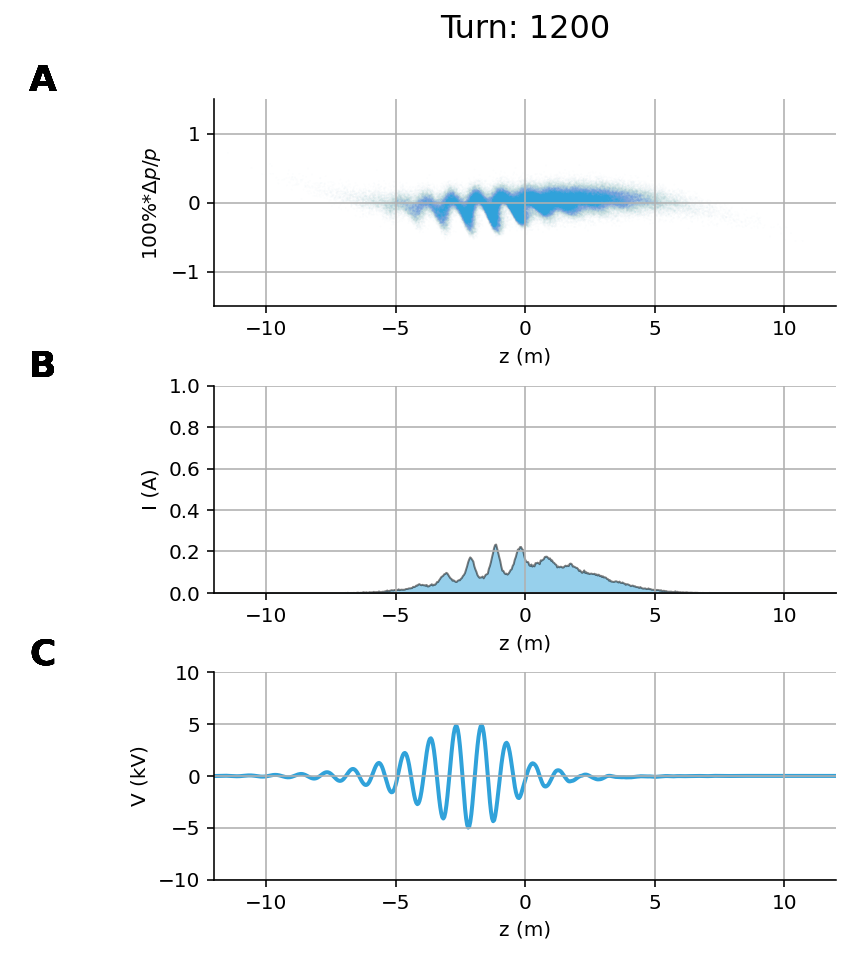
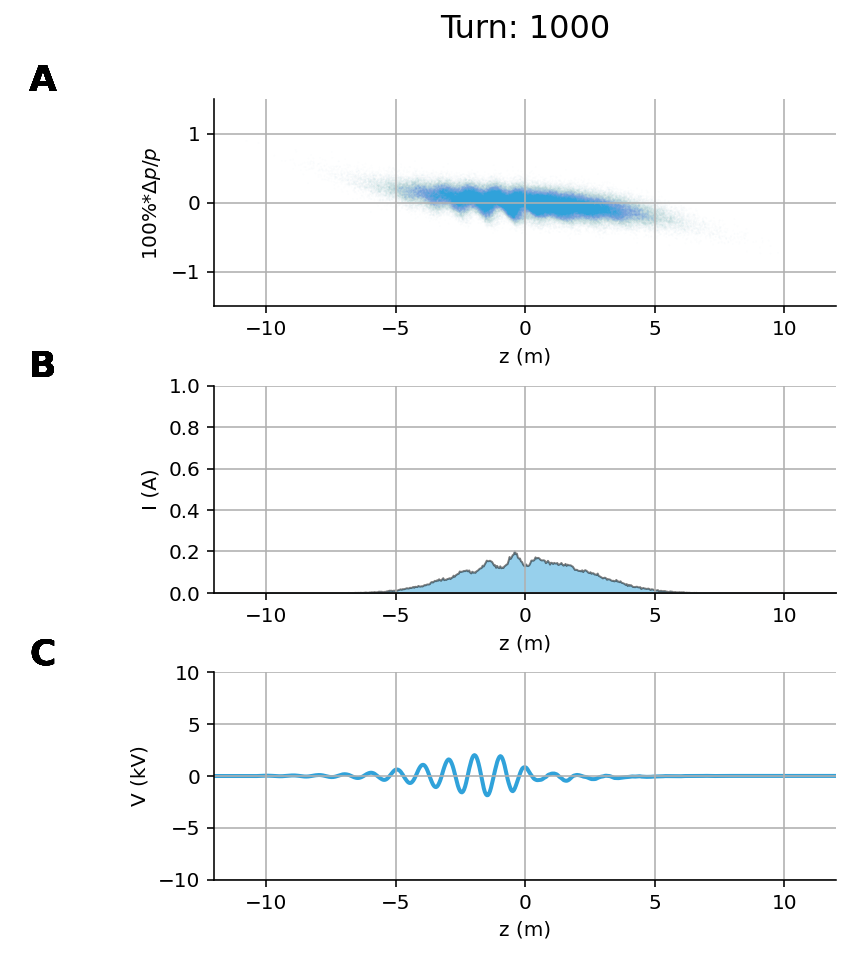
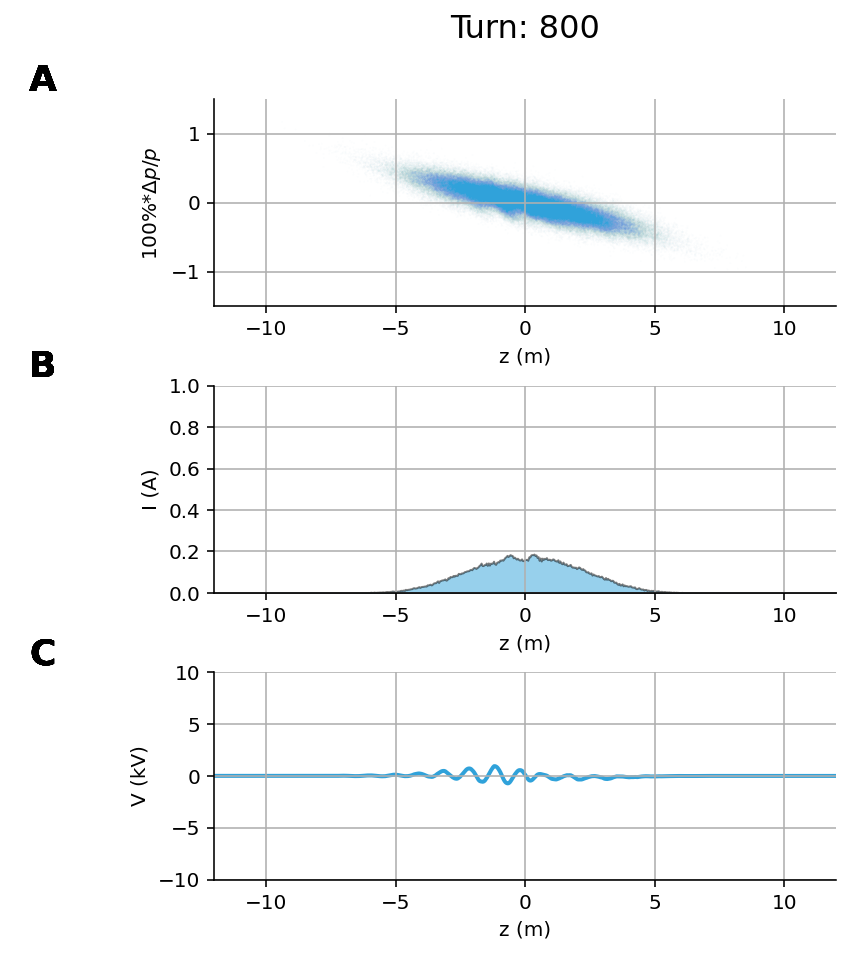
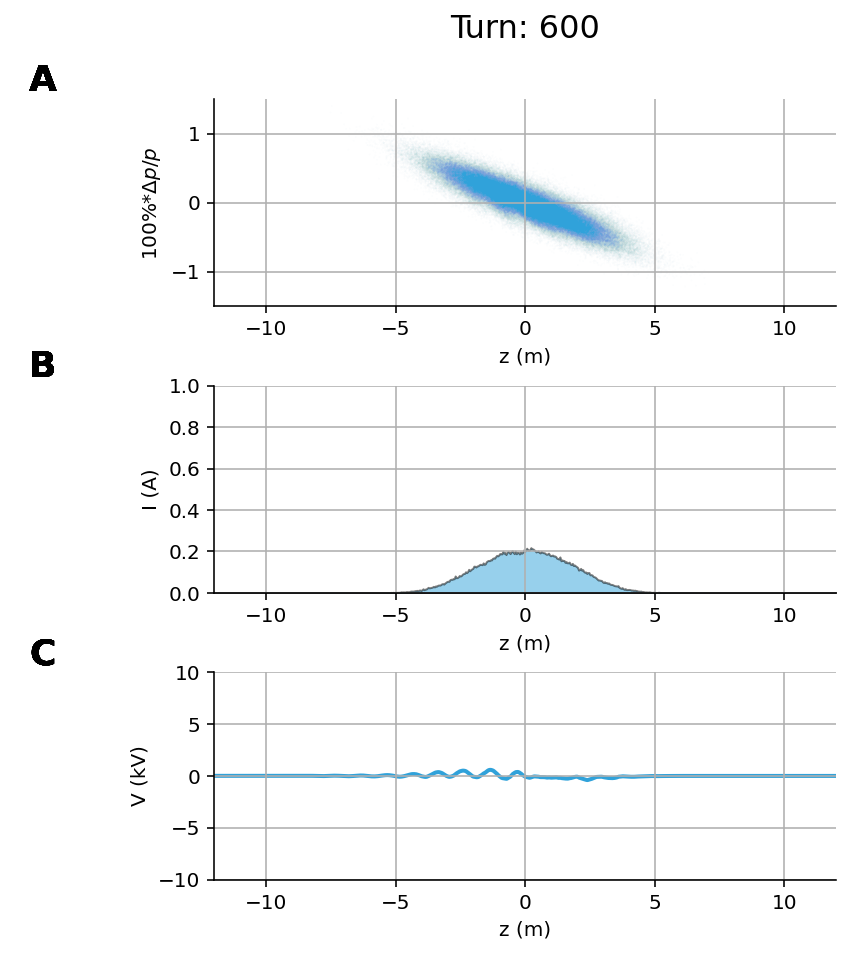
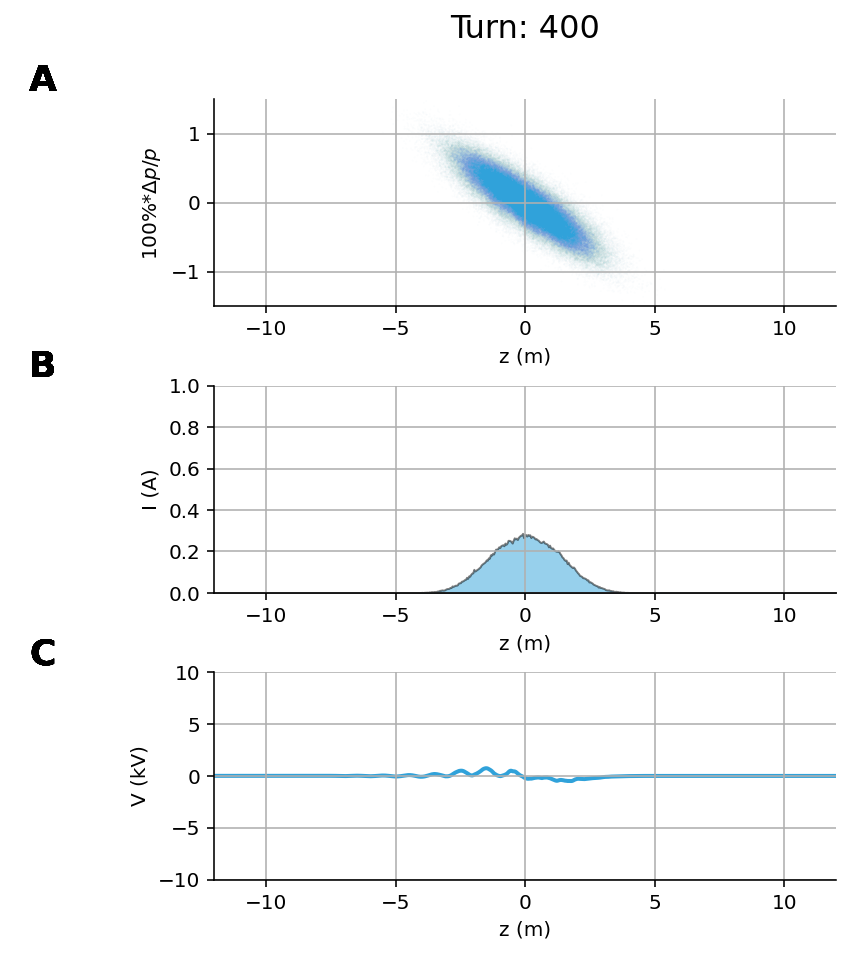
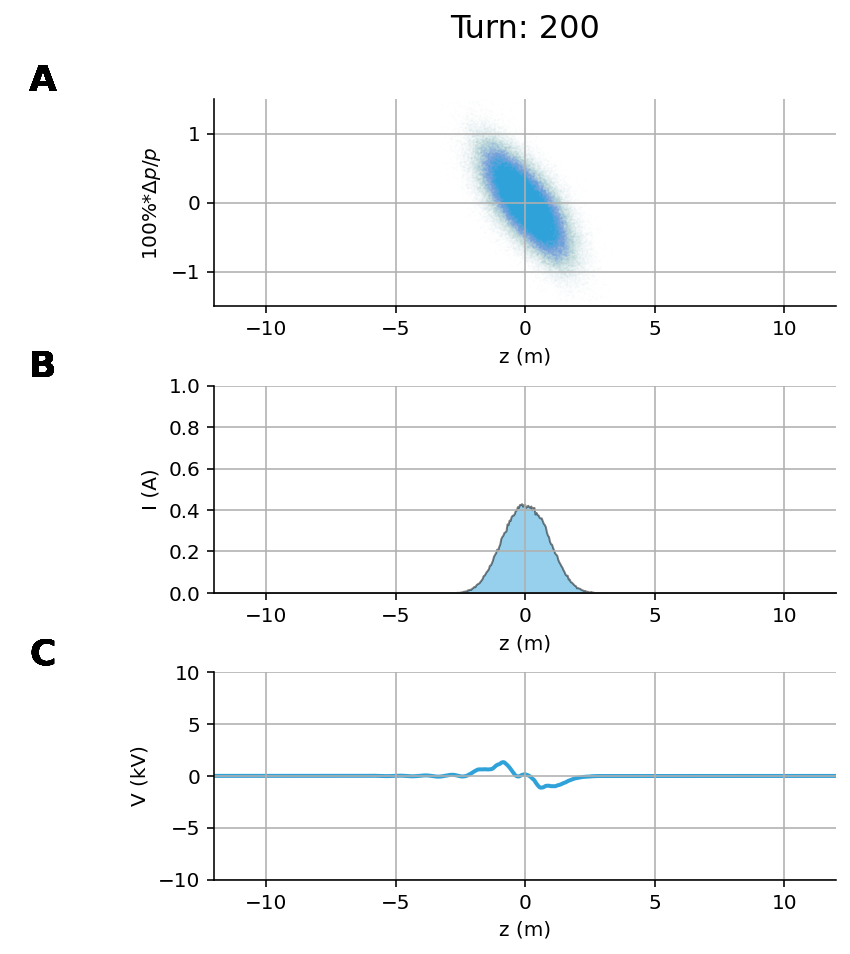
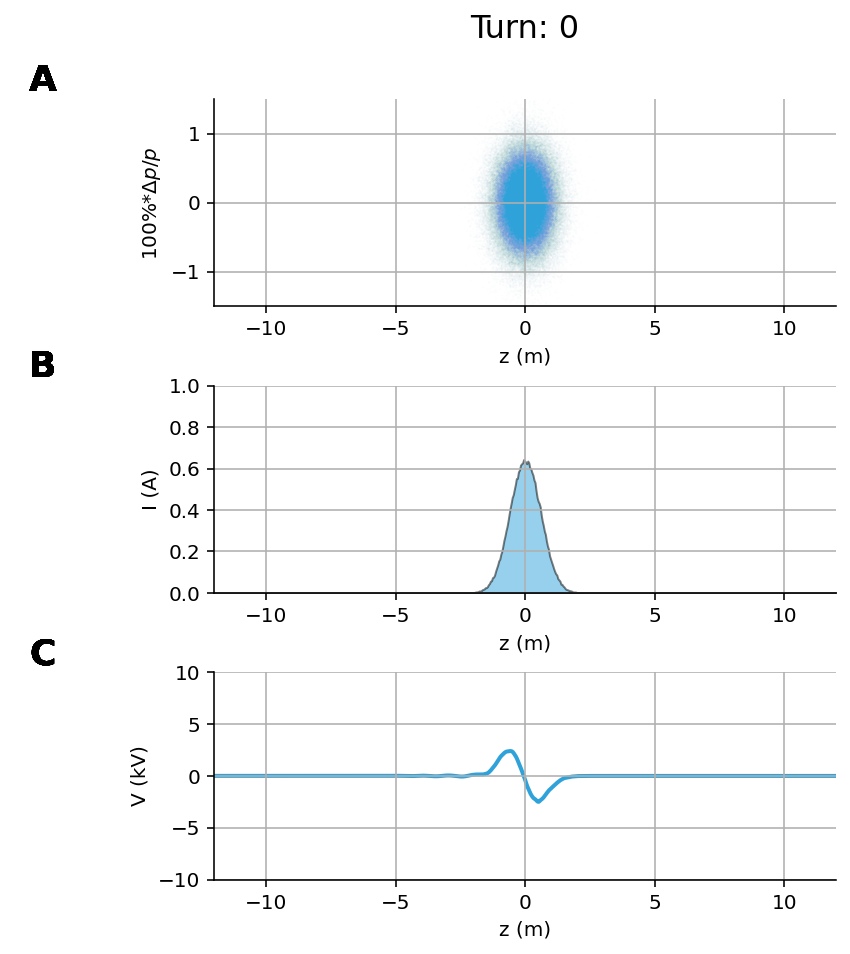

In [24]:
items = [(turn, plot_z_dp(turn)) for turn in t_plots]

m = hv.HoloMap(items, kdims = ['Turn'])
m = m.collate()
m.opts(fig_size=120)

In [25]:
#hv.output(m.opts(tight=True), holomap='gif', fps=4, dpi=120)

In [26]:
#np.save("plots.npy", data2plot)

In [27]:
%load_ext watermark

In [28]:
%watermark --python --date --iversions --machine

Python implementation: CPython
Python version       : 3.12.2
IPython version      : 8.25.0

Compiler    : GCC 12.3.0
OS          : Linux
Release     : 6.8.0-39-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

holoviews: 1.19.0
sys      : 3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 20:50:58) [GCC 12.3.0]
numpy    : 1.26.4
json     : 2.0.9



In [29]:
pwd

'/data/shared/examples'

In [31]:
!jupyter nbconvert --to HTML microwave_instability.ipynb

[NbConvertApp] Converting notebook microwave_instability.ipynb to HTML
/opt/anaconda3/share/jupyter/nbconvert/templates/base/display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys([]) is not able to be represented.
  {%- elif type == 'text/vnd.mermaid' -%}
/opt/anaconda3/share/jupyter/nbconvert/templates/base/display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys([]) is not able to be represented.
  {%- elif type == 'text/vnd.mermaid' -%}
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 2883302 bytes to microwave_instability.html
